In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

# Data Preparation


In [6]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [7]:
# describe data
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


Insights : Berdasarkan hasil eksplorasi awal terhadap dataset yang berjumlah 500 baris dan 12 kolom, dapat terlihat bahwa data berada dalam kondisi sangat baik, karena tidak terdapat missing values pada seluruh variabel. Secara statistik, rata-rata pendapatan pelanggan berada di angka 62.244, dengan rentang yang cukup besar antara pendapatan terendah dan tertinggi, menunjukkan adanya variasi signifikan antar kelompok nasabah. Rata-rata usia pelanggan adalah 40 tahun, dengan rentang usia 18 hingga 64 tahun, menggambarkan bahwa mayoritas nasabah merupakan kelompok usia dewasa yang aktif menggunakan layanan perbankan.

Variabel finansial seperti Credit Score, Balance, Loan Approval Amount, dan Credit Card Limit juga menunjukkan variasi yang cukup besar, menandakan bahwa nasabah berasal dari latar belakang ekonomi yang beragam, mulai dari pelanggan pendapatan rendah hingga tinggi. Pelanggan telah bersama bank selama rata-rata 10 tahun, yang mengindikasikan tingkat loyalitas yang cukup baik. Namun demikian, tingkat Customer Satisfaction memiliki nilai rata-rata hanya 2,56 dari skala 5, yang berarti tingkat kepuasan pelanggan relatif rendah dan dapat menjadi indikator awal adanya risiko churn. Selain itu, nilai Purchase Frequency dan Online Activity yang berada pada level sedang menunjukkan bahwa perilaku konsumsi pelanggan belum optimal, dan masih ada ruang untuk meningkatkan interaksi melalui kanal digital. Secara keseluruhan, dataset ini memiliki karakteristik yang kaya dan variatif, sehingga sangat potensial untuk menghasilkan insight mendalam melalui analisis segmentasi pelanggan.


In [8]:
df.shape

(500, 12)

In [9]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


In [10]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Income': array([66161.01279, 78639.20248, 70207.25321, 65866.23872, 56774.10995,
        73442.05848, 57819.04084, 91882.97506, 97274.70704, 53758.11391,
        84379.37786, 64667.11898, 67603.34208, 94419.74787, 30327.70436,
        31534.69748, 26516.37981, 87446.48842, 83361.75632, 90250.91112,
        98396.37567, 84936.89232, 59610.95217, 83539.68822, 33870.58194,
        72994.0766 , 35751.49656, 95850.16878, 64138.62413, 56099.6455 ,
        44841.67091, 83067.52671, 59211.27492, 67632.54617, 26409.23503,
        71322.66228, 70907.1792 , 71270.04977, 95781.10589, 76136.52243,
        51963.09254, 57777.39653, 77322.33969, 29516.91037, 75007.50366,
        75297.84022, 40778.69208, 34669.47232, 48657.12632, 52278.30782,
        67764.75778, 57895.11351, 99128.03785, 32653.36081, 40665.75671,
        37098.21384, 73983.12441, 43996.87019, 59973.30796, 43331.9194 ,
        36922.71877, 33278.13559, 74224.71921, 35363.72135, 39743.67713,
        52654.3878 , 86574.49224, 32282.5

In [19]:
# duplicate df
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. Ordinal Encoding
# Columns: education
education_mapping = {'High School': 0, 'Bachelor': 1, 'Master': 2, 'PhD' : 3}
df['Education'] = df['Education'].map(education_mapping)

df.sample(n = 5)

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
203,38470.27582,37,2,454,5,4,79.132533,47066.889290,8078.873157,0.347321,3,0.364227
390,29703.47140,42,0,536,10,47,5497.102489,17957.985080,4696.731819,0.241236,1,0.855286
499,62939.97879,29,1,830,4,21,991.634514,6558.185356,10078.693590,0.577219,2,0.636428
27,95850.16878,30,2,514,8,72,3147.240583,36738.626410,19557.510890,0.069575,2,0.685110
413,43895.57412,41,2,455,8,36,5019.463732,6789.737317,17049.731780,0.299662,2,0.022479


# Exploratory Data Analysis

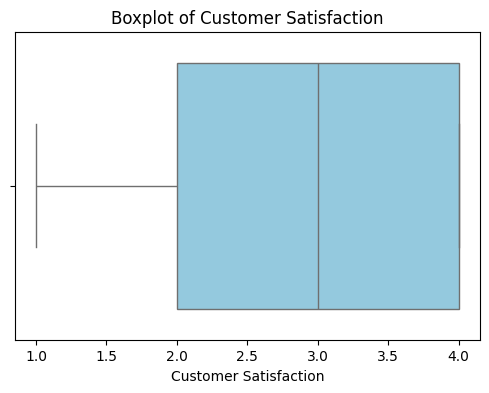

In [12]:
# Boxplot Customer Satisfaction
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Customer_Satisfaction'], color='skyblue')
plt.title('Boxplot of Customer Satisfaction')
plt.xlabel('Customer Satisfaction')
plt.show()

Insights : Boxplot menunjukkan bahwa tingkat Customer Satisfaction pada dataset cenderung terpusat di nilai menengah, yaitu sekitar 2–3, dengan median berada di kisaran 3. Hal ini menandakan bahwa sebagian besar pelanggan merasa cukup puas namun belum sangat puas dengan layanan bank. Rentang data berada antara 1 hingga 4, yang berarti tidak ada pelanggan yang memberikan skor kepuasan maksimum (10), dan juga tidak terdapat outlier ekstrem di luar rentang ini.

Distribusi yang terlihat melebar dari 2 hingga 4 menunjukkan adanya kelompok pelanggan yang puas, tetapi bagian kiri boxplot yang mencapai nilai 1 menunjukkan bahwa ada juga segmen pelanggan yang kurang puas dan mungkin berpotensi meninggalkan layanan (churn). Secara umum, tingkat kepuasan cenderung moderat namun belum optimal, sehingga bank perlu meningkatkan kualitas layanan, memperbaiki pengalaman pelanggan, atau menyediakan fitur tambahan untuk meningkatkan skor kepuasan pelanggan ke kategori yang lebih tinggi.

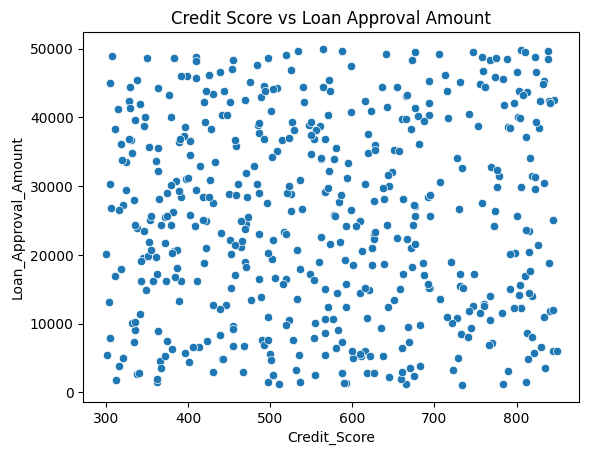

In [14]:
# Scatter Credit Score vs Loan Approval Amount
sns.scatterplot(x='Credit_Score', y='Loan_Approval_Amount', data=df)
plt.title("Credit Score vs Loan Approval Amount")
plt.show()


Insights : Scatter plot tersebut menunjukkan bahwa hubungan antara Credit Score dan Loan Approval Amount tampak sangat menyebar dan tidak membentuk pola tertentu. Titik-titik data tersebar acak di seluruh area grafik, sehingga tidak terlihat adanya korelasi yang jelas, baik positif maupun negatif, antara skor kredit pelanggan dengan jumlah pinjaman yang disetujui.

Hal ini menunjukkan bahwa dalam dataset ini, besar kecilnya jumlah pinjaman yang disetujui tidak terlalu bergantung pada skor kredit nasabah. Pelanggan dengan kredit score rendah maupun tinggi sama-sama bisa mendapatkan pinjaman dalam berbagai besaran. Ini dapat mengindikasikan bahwa pihak bank mempertimbangkan faktor lain dalam menyetujui jumlah pinjaman.

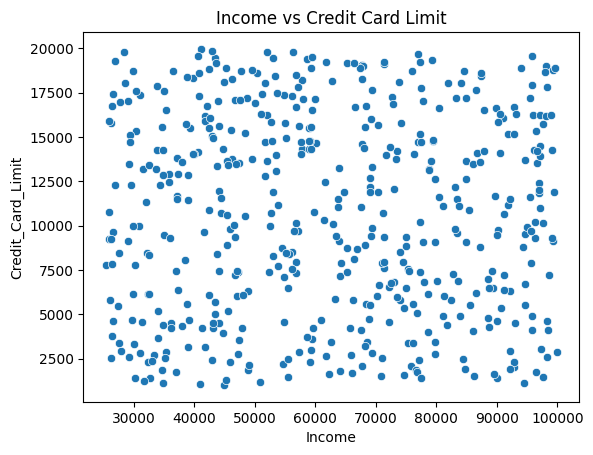

In [68]:
# Scatter Credit Score vs Loan Approval Amount
sns.scatterplot(x='Income', y='Credit_Card_Limit', data=df)
plt.title("Income vs Credit Card Limit")
plt.show()

Insights : Scatter plot menunjukkan bahwa hubungan antara Income dan Credit Card Limit tampak lemah atau tidak menunjukkan pola yang jelas. Titik-titik tersebar secara acak di seluruh grafik, sehingga tidak terlihat tren bahwa semakin tinggi pendapatan seseorang maka semakin besar pula limit kartu kreditnya.

Meskipun pelanggan dengan pendapatan tinggi (di atas 80.000) memang cenderung memiliki limit yang juga tinggi, pelanggan berpendapatan rendah (sekitar 30.000–40.000) tetap dapat memiliki limit kartu kredit yang besar. Hal ini mengindikasikan bahwa bank tidak hanya menggunakan pendapatan sebagai faktor utama untuk menentukan limit kartu kredit

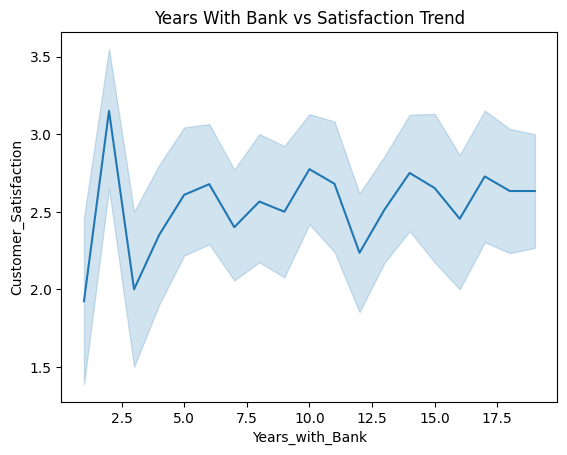

In [16]:
# Line Plot Years with Bank vs Satisfaction Trend
sns.lineplot(x='Years_with_Bank', y='Customer_Satisfaction', data=df)
plt.title("Years With Bank vs Satisfaction Trend")
plt.show()

Insights : Grafik menunjukkan bahwa Customer Satisfaction tidak meningkat secara signifikan meskipun pelanggan sudah lama menjadi nasabah bank. Nilai kepuasan cenderung berada pada kisaran 2.3 – 2.8 sepanjang periode 1 hingga 19 tahun, dengan fluktuasi kecil namun tidak ada pola kenaikan yang jelas.

Pada tahun-tahun awal (1–3 tahun), kepuasan tampak naik-turun dengan cukup tajam, namun setelah itu grafik terlihat stabil dan cenderung mendatar, mengindikasikan bahwa durasi menjadi nasabah tidak terlalu memengaruhi tingkat kepuasan pelanggan. Bahkan beberapa titik menunjukkan penurunan di tengah periode loyalitas, yang menandakan bahwa pelanggan lama belum tentu lebih puas dibanding pelanggan baru.

Shaded area (confidence band) menunjukkan variasi nilai kepuasan yang cukup besar pada hampir setiap lama waktu bergabung, sehingga loyalitas waktu tidak berkorelasi kuat dengan kepuasan.

# Clustering Modeling (Agglomerative Unscaled)

Skipping Ward linkage with Manhattan metric (not supported).


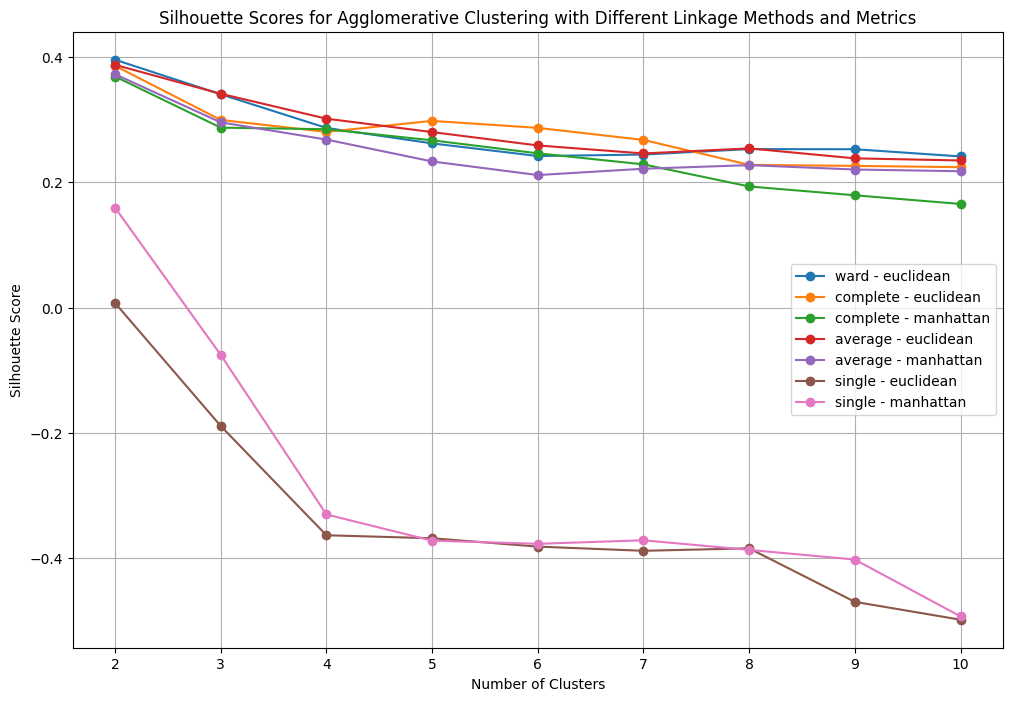

Best Silhouette Score: 0.3957270696821577
Optimal Number of Clusters: 2
Optimal Linkage Method: ward
Optimal Metric: euclidean


In [38]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        # ward gabisa manhattan, bisanya eucladian
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df)
            silhouette_avg = silhouette_score(df, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

Insights : Grafik silhouette score menunjukkan bahwa kualitas cluster paling baik terjadi pada jumlah cluster = 2, terlepas dari metode linkage dan metric yang digunakan. Pada titik ini, beberapa kombinasi menghasilkan nilai silhouette tertinggi, terutama Ward linkage dengan Euclidean distance, yang terbukti menjadi model terbaik dengan nilai silhouette sekitar 0.395. Hal ini mengindikasikan bahwa struktur data memang lebih cocok dipisahkan menjadi dua kelompok besar daripada banyak cluster kecil.

Selain itu, metode complete linkage dengan euclidean maupun manhattan juga memberikan performa yang relatif stabil dan cukup tinggi pada 2–4 cluster, menunjukkan bahwa metode complete masih mampu mempertahankan separasi cluster yang baik. Sebaliknya, metode single linkage memberikan hasil yang buruk, ditunjukkan dengan nilai silhouette negatif atau mendekati nol, sehingga tidak cocok untuk dataset ini karena cenderung menghasilkan chaining effect atau cluster yang terlalu memanjang.


In [39]:
# Hierarchical Clustering using Best Combination
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df)

# Evaluation
ss = silhouette_score(df, y_hc)
print("Complete Euclidean Score: ", ss)

Complete Euclidean Score:  0.3957270696821577


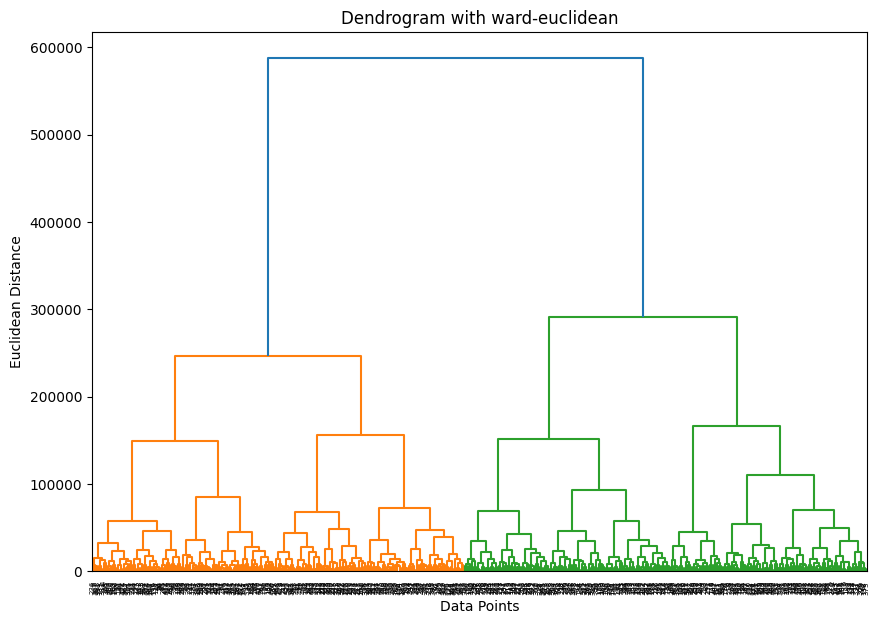

In [40]:
# Average Distance
linked = linkage(df, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [41]:
# Add the cluster labels to the original data on best model
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Agglo
0,66161.01279,57,1,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,0
1,78639.20248,60,0,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,0
2,70207.25321,46,0,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,0
3,65866.23872,42,0,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,0
4,56774.10995,36,1,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,1


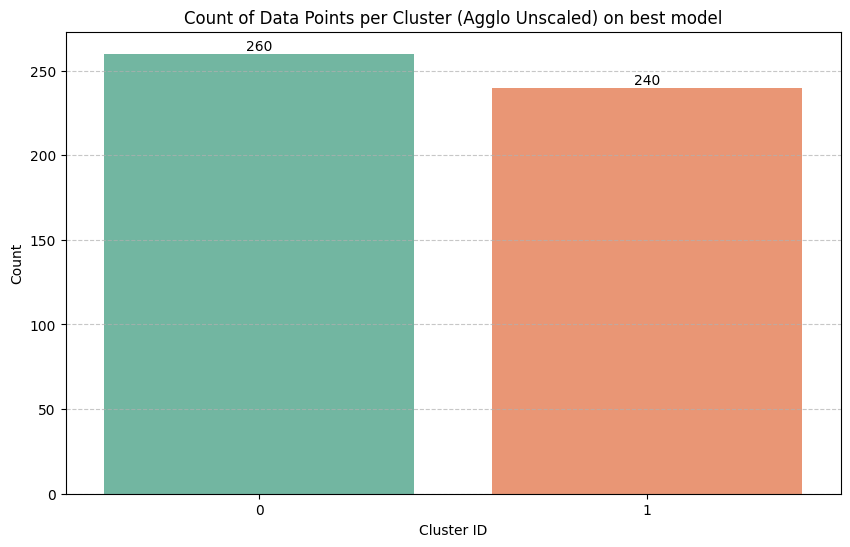

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo Unscaled) on best model')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Insights : Grafik di atas menunjukkan jumlah data yang masuk ke masing-masing cluster pada model Agglomerative Clustering terbaik (versi unscaled). Terlihat bahwa Cluster 0 berisi 260 data, sedangkan Cluster 1 berisi 240 data. Pembagian ini relatif seimbang, yang berarti proses pengelompokan berhasil membagi populasi tanpa terjadi dominasi satu cluster yang terlalu besar. Keseimbangan ini biasanya menunjukkan bahwa pola atau karakteristik antar kelompok memang cukup berbeda sehingga data bisa terpisah secara natural menjadi dua kelompok yang hampir sama besar. Secara keseluruhan, visualisasi ini mengonfirmasi bahwa model mampu mengidentifikasi dua segmentasi utama dengan distribusi yang proporsional.

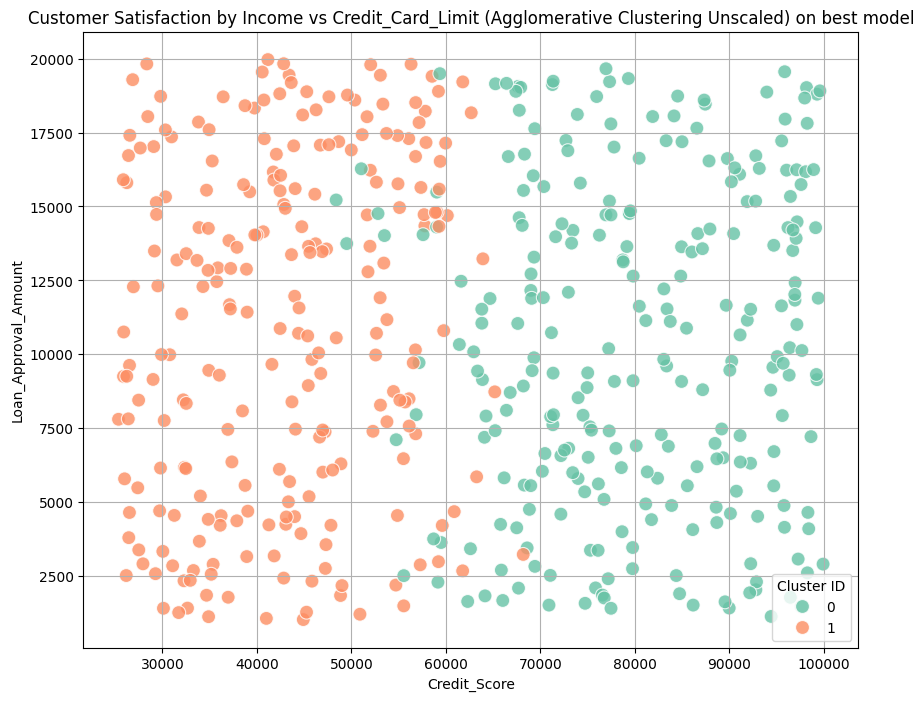

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Income', y='Credit_Card_Limit', hue='Agglo', palette='Set2', s=100, alpha=0.8)
plt.title('Customer Satisfaction by Income vs Credit_Card_Limit (Agglomerative Clustering Unscaled) on best model')
plt.xlabel('Credit_Score')
plt.ylabel('Loan_Approval_Amount')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

Insights : Grafik ini menunjukkan hubungan antara Income dan Credit Card Limit terhadap Loan Approval Amount, yang telah dipetakan menggunakan Agglomerative Clustering (Unscaled). Dari visualisasi terlihat pembagian cluster yang sangat jelas secara horizontal: Cluster 0 (warna oranye) didominasi oleh nasabah dengan pendapatan lebih rendah dan limit kartu kredit yang lebih kecil. Sementara itu, Cluster 1 (warna hijau) berisi nasabah dengan pendapatan lebih tinggi dan limit kartu kredit yang lebih besar. Pola ini menunjukkan bahwa segmentasi sangat dipengaruhi oleh tingkat pendapatan dan kapasitas kredit. Selain itu, data pada dua cluster tampak cukup terpisah tanpa banyak tumpang tindih, menandakan bahwa model berhasil mengidentifikasi dua kelompok nasabah dengan karakteristik finansial yang berbeda secara nyata. Secara umum, cluster ini menggambarkan bahwa semakin tinggi pendapatan dan limit kartu kredit, semakin besar pula jumlah pinjaman yang dapat disetujui oleh pihak bank.

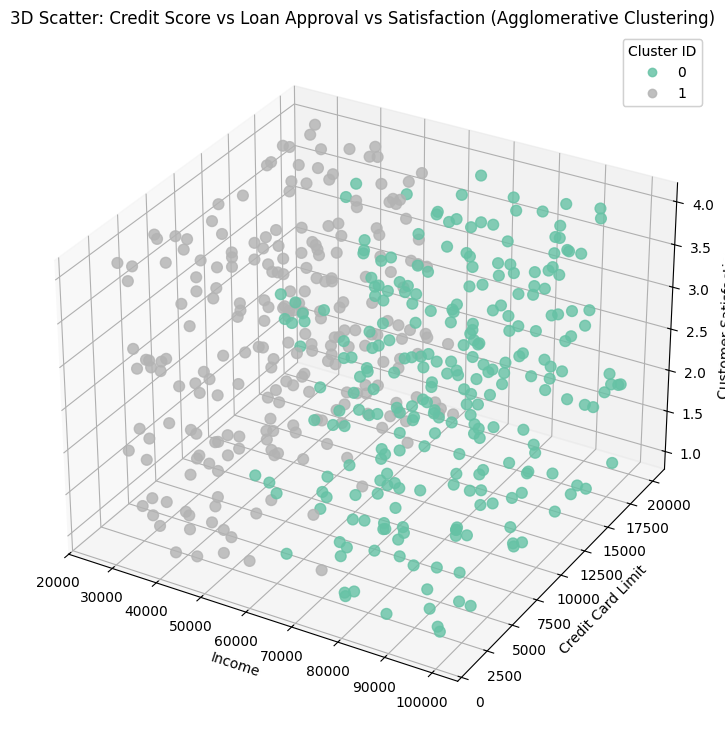

In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Buat figure 3D
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Scatter 3D
scatter = ax.scatter(
    df['Income'],
    df['Credit_Card_Limit'],
    df['Customer_Satisfaction'],
    c=df['Agglo'],
    cmap='Set2',
    s=60,
    alpha=0.8
)

# Label
ax.set_title('3D Scatter: Credit Score vs Loan Approval vs Satisfaction (Agglomerative Clustering)')
ax.set_xlabel('Income')
ax.set_ylabel('Credit Card Limit')
ax.set_zlabel('Customer Satisfaction')

# Legend
legend = ax.legend(*scatter.legend_elements(), title="Cluster ID")
ax.add_artist(legend)

plt.show()

Insights : Grafik 3D ini menampilkan hubungan antara Credit Score, Loan Approval Amount, dan Customer Satisfaction berdasarkan hasil Agglomerative Clustering. Terlihat bahwa Cluster 0 (warna abu-abu) cenderung berkelompok pada area dengan credit score lebih rendah, pinjaman yang disetujui lebih kecil, dan tingkat kepuasan yang bervariasi tetapi cenderung sedang–rendah. Sementara itu, Cluster 1 (warna hijau) lebih banyak muncul pada area dengan credit score lebih tinggi serta approval pinjaman yang cenderung lebih besar, dan juga menunjukkan tingkat kepuasan yang sedikit lebih baik. Pola penyebaran data ini menggambarkan bahwa kombinasi credit score dan loan approval amount cukup berpengaruh dalam membentuk segmentasi nasabah. Semakin tinggi kepercayaan finansial (credit score) dan semakin besar pinjaman yang disetujui, semakin besar kemungkinan nasabah masuk ke cluster yang dianggap lebih “baik” dalam konteks finansial dan kepuasan layanan.

# Clustering Modeling (Agglomerative Scaled)

In [45]:
# Create a StandardScaler object
sc = StandardScaler()
df_scaled = df.copy

# Fit and transform the selected columns
df_scaled= sc.fit_transform(df[['Income', 'Age', 'Credit_Score', 'Years_with_Bank', 'Transaction_Count', 'Balance', 'Loan_Approval_Amount', 'Credit_Card_Limit', 'Purchase_Frequency', 'Online_Activity']])

df_scaled = pd.DataFrame(df_scaled, columns=['Income', 'Age', 'Credit_Score', 'Years_with_Bank', 'Transaction_Count', 'Balance', 'Loan_Approval_Amount', 'Credit_Card_Limit', 'Purchase_Frequency', 'Online_Activity'])
df_scaled.head()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Online_Activity
0,0.179150,1.303097,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-0.992013
1,0.749977,1.533191,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,0.186427
2,0.364249,0.459420,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,1.184595
3,0.165665,0.152629,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,-1.274907
4,-0.250263,-0.307558,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.684898


In [46]:
# get stastical information on the new dataset
df_scaled.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Online_Activity
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,2.158274e-16,1.421085e-16,2.593481e-16,1.598721e-16,9.237056e-17,-3.392842e-16,-1.918465e-16,4.085621e-17,1.492140e-16,-8.171241e-17
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-1.687691e+00,-1.688120e+00,-1.666120e+00,-1.905592e+00,-1.653782e+00,-1.716418e+00,-1.706699e+00,-1.723224e+00,-1.811333e+00,-1.676552e+00
25%,-8.535233e-01,-8.444436e-01,-8.739031e-01,-7.396169e-01,-8.179404e-01,-8.547889e-01,-8.524396e-01,-8.660940e-01,-8.511311e-01,-8.654451e-01
50%,-3.347132e-02,-7.746485e-02,-1.881200e-02,3.769986e-02,-1.692579e-02,-3.416637e-02,8.970695e-03,1.912909e-02,6.587104e-02,-3.124291e-02
75%,8.033504e-01,8.429096e-01,7.985545e-01,8.150166e-01,8.189156e-01,8.593735e-01,9.102263e-01,8.839671e-01,8.868705e-01,8.997453e-01
max,1.723192e+00,1.839982e+00,1.785682e+00,1.592333e+00,1.759237e+00,1.683474e+00,1.725528e+00,1.681174e+00,1.702529e+00,1.717971e+00


In [47]:
df_cat = df[['Education', 'Customer_Satisfaction']]
df_cat.head()

,Education,Customer_Satisfaction
0,1,1
1,0,2
2,0,3
3,0,4
4,1,4


In [48]:
df_scaled = pd.concat([df_scaled, df_cat], axis=1)
df_scaled.head()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Online_Activity,Education,Customer_Satisfaction
0,0.179150,1.303097,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-0.992013,1,1
1,0.749977,1.533191,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,0.186427,0,2
2,0.364249,0.459420,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,1.184595,0,3
3,0.165665,0.152629,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,-1.274907,0,4
4,-0.250263,-0.307558,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.684898,1,4


Skipping Ward linkage with Manhattan metric (not supported).


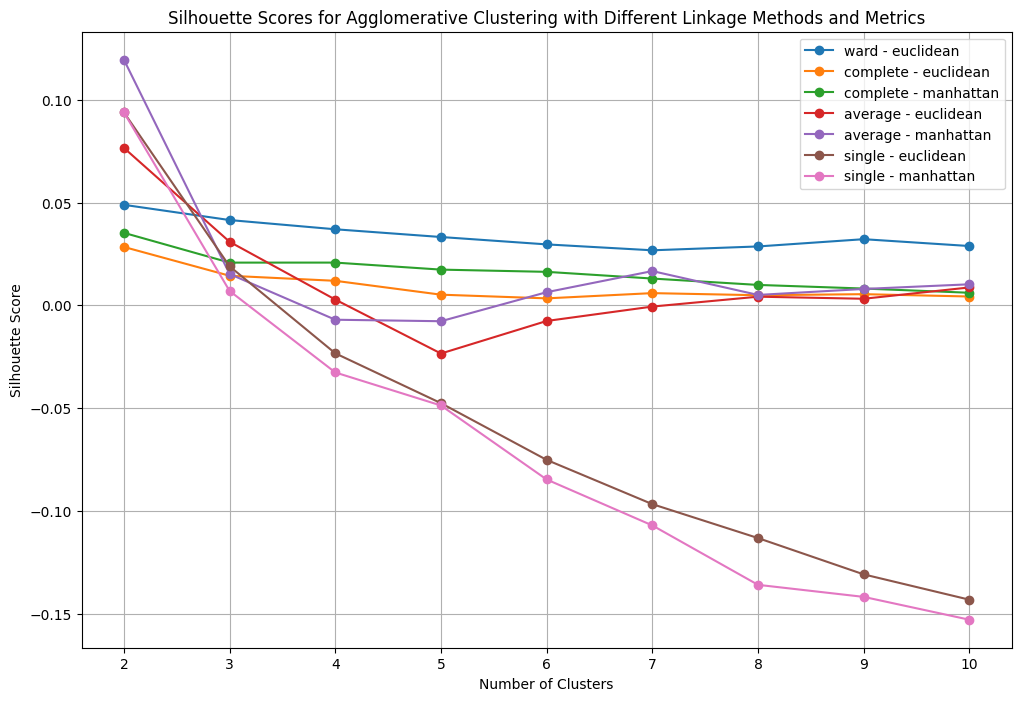

Best Silhouette Score: 0.11941665128362669
Optimal Number of Clusters: 2
Optimal Linkage Method: average
Optimal Metric: manhattan


In [49]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        # ward gabisa manhattan, bisanya eucladian
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

Insights : Grafik ini menunjukkan perbandingan skor silhouette dari berbagai kombinasi metode linkage dan jenis jarak pada Agglomerative Clustering ketika jumlah cluster divariasikan dari 2 hingga 10. Pola yang terlihat menunjukkan bahwa jumlah cluster terbaik adalah 2, karena pada titik ini mayoritas kombinasi metode menghasilkan skor silhouette yang paling tinggi sebelum menurun secara konsisten. Dari semua garis pada grafik, kombinasi yang memberikan performa terbaik adalah average linkage dengan Manhattan distance, menghasilkan skor silhouette tertinggi sekitar 0.119. Skor silhouette positif menunjukkan bahwa struktur cluster masih cukup terbentuk meskipun tidak terlalu kuat, tetapi tetap merupakan pilihan terbaik dibandingkan jumlah cluster lainnya. Setelah jumlah cluster meningkat di atas 2, nilai silhouette untuk sebagian besar metode terus menurun, bahkan beberapa turun ke nilai negatif, menandakan bahwa cluster menjadi kurang jelas, saling tumpang tindih, dan tidak terbentuk secara optimal. Secara keseluruhan, grafik ini memastikan bahwa untuk data yang telah di scale, konfigurasi paling stabil dan terpisah dengan baik adalah 2 cluster, menggunakan average linkage + Manhattan metric.

In [52]:
# Hierarchical Clustering using Best Combination
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc_scaled = agglo.fit_predict(df_scaled)

# Evaluation
ss = silhouette_score(df_scaled, y_hc_scaled)
print("Complete Euclidean Score: ", ss)

Complete Euclidean Score:  0.11941665128362669


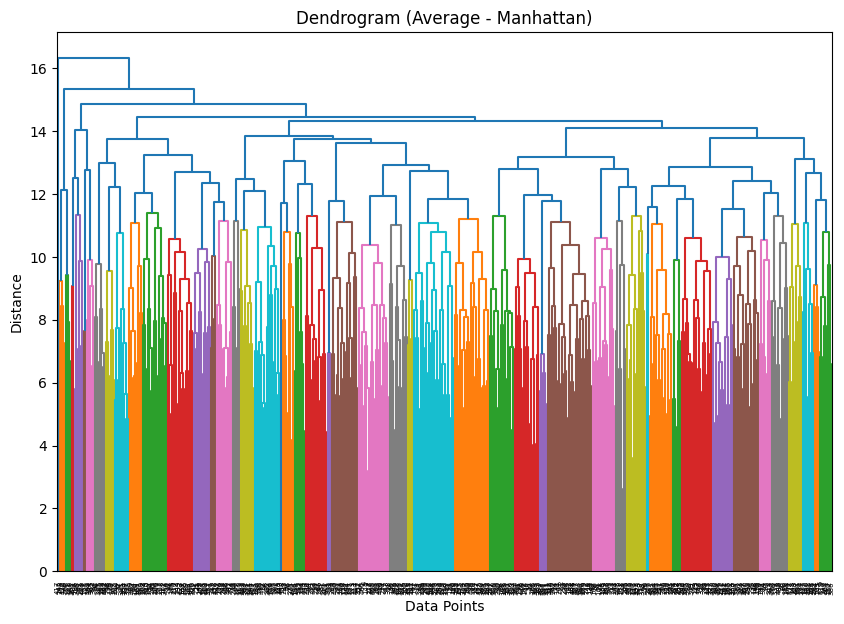

In [56]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Average linkage + Manhattan distance
linked = linkage(df_scaled, method='average', metric='cityblock')
# 'cityblock' = nama resmi untuk Manhattan di SciPy

plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram (Average - Manhattan)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [57]:
# Add the cluster labels to the original data on best model
df_scaled['Agglo'] = y_hc_scaled

# Analyze the clusters with the original values
df_scaled.head()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Online_Activity,Education,Customer_Satisfaction,Agglo
0,0.179150,1.303097,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-0.992013,1,1,0
1,0.749977,1.533191,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,0.186427,0,2,0
2,0.364249,0.459420,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,1.184595,0,3,0
3,0.165665,0.152629,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,-1.274907,0,4,0
4,-0.250263,-0.307558,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.684898,1,4,0


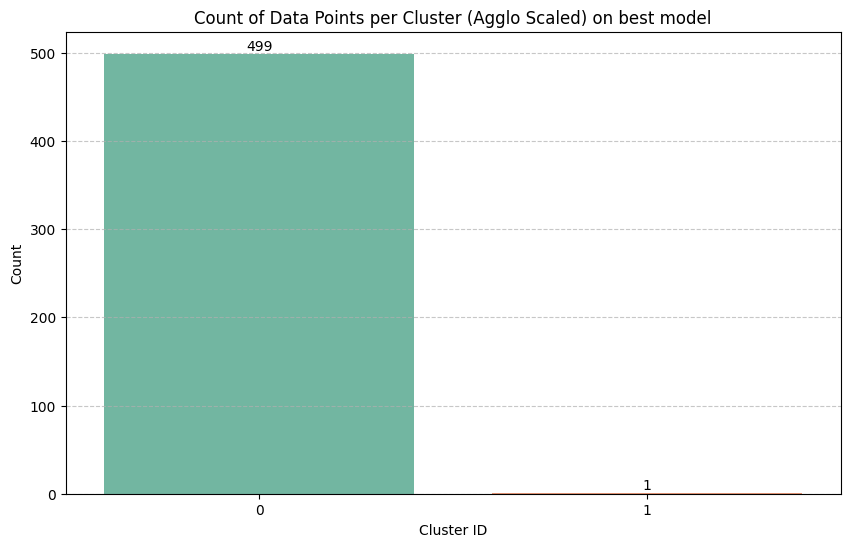

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df_scaled['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo Scaled) on best model')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Insights : Grafik ini menunjukkan jumlah data pada masing-masing cluster untuk model Agglomerative Clustering terbaik setelah data melalui proses scaling. Hasilnya terlihat sangat tidak seimbang: Cluster 0 berisi hampir seluruh data (499 poin), sementara Cluster 1 hanya berisi 1 data. Ketidakseimbangan ekstrem seperti ini mengindikasikan bahwa proses scaling mengubah struktur jarak antar data sehingga algoritma sulit menemukan pemisahan cluster yang bermakna. Dalam kondisi ini, model “terpaksa” mengelompokkan hampir semua datapoint ke satu cluster, karena perbedaan jarak antar titik menjadi terlalu kecil atau tidak lagi representatif terhadap variasi asli data. Fenomena ini sekaligus menjelaskan mengapa skor silhouette pada hasil scaled cenderung rendah, cluster yang terbentuk tidak benar-benar terpisah dan tidak membentuk pola alami. Secara keseluruhan, grafik ini menunjukkan bahwa scaling membuat hierarchical clustering kurang efektif, dan model menjadi tidak mampu menghasilkan segmentasi yang seimbang maupun meaningful.

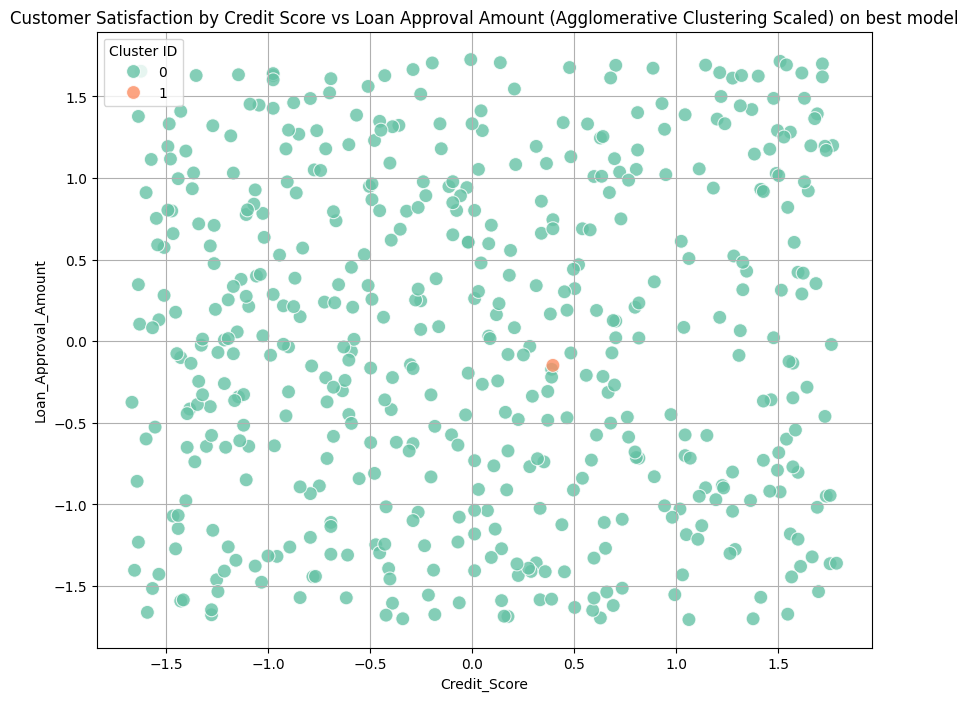

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_scaled, x='Credit_Score', y='Loan_Approval_Amount', hue='Agglo', palette='Set2', s=100, alpha=0.8)
plt.title('Customer Satisfaction by Credit Score vs Loan Approval Amount (Agglomerative Clustering Scaled) on best model')
plt.xlabel('Credit_Score')
plt.ylabel('Loan_Approval_Amount')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

Insights : Grafik ini menunjukkan hubungan antara Credit Score dan Loan Approval Amount pada data yang telah di-scale, berdasarkan hasil Agglomerative Clustering terbaik. Terlihat bahwa hampir seluruh titik data diberi label Cluster 0 (warna hijau), sedangkan Cluster 1 (warna oranye) hanya muncul pada satu titik saja. Penyebaran titik yang homogen dan hampir seragam ini menunjukkan bahwa setelah proses scaling, model kehilangan kemampuan untuk membedakan pola alami antar data. Jarak antar titik menjadi relatif mirip satu sama lain, sehingga algoritma cenderung menempatkan seluruh data ke dalam satu cluster besar. Ini menandakan bahwa clustering terhadap data scaled tidak menghasilkan segmentasi yang meaningful, karena tidak ada pemisahan kelompok yang jelas maupun perbedaan karakteristik antar cluster. Kesimpulannya, visualisasi ini memperkuat temuan sebelumnya bahwa Agglomerative Clustering dengan data scaled tidak efektif, karena hasilnya justru meratakan data dan membuat cluster menjadi tidak representatif.

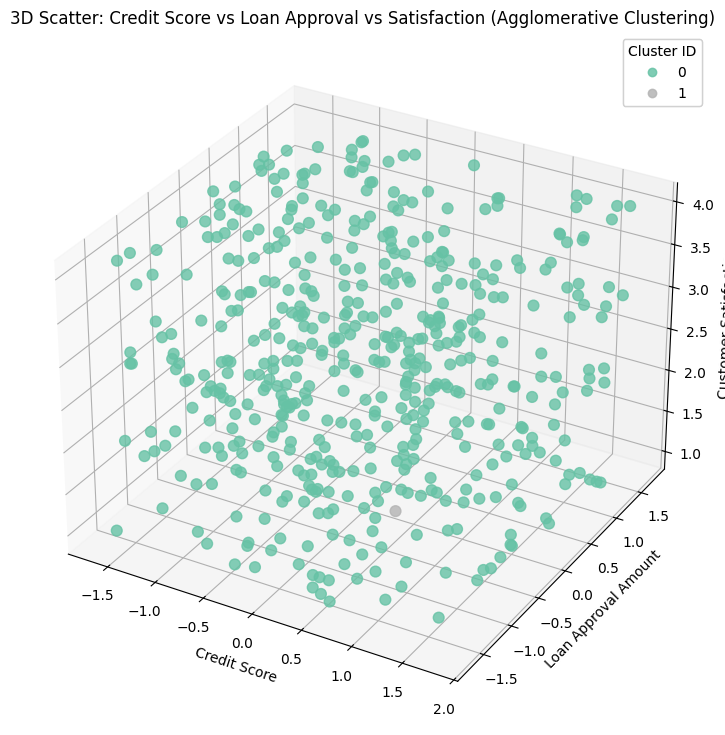

In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Buat figure 3D
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Scatter 3D
scatter = ax.scatter(
    df_scaled['Credit_Score'],
    df_scaled['Loan_Approval_Amount'],
    df_scaled['Customer_Satisfaction'],
    c=df_scaled['Agglo'],
    cmap='Set2',
    s=60,
    alpha=0.8
)

# Label
ax.set_title('3D Scatter: Credit Score vs Loan Approval vs Satisfaction (Agglomerative Clustering)')
ax.set_xlabel('Credit Score')
ax.set_ylabel('Loan Approval Amount')
ax.set_zlabel('Customer Satisfaction')

# Legend
legend = ax.legend(*scatter.legend_elements(), title="Cluster ID")
ax.add_artist(legend)

plt.show()

Insights : Grafik 3D ini menampilkan hubungan antara Credit Score, Loan Approval Amount, dan Customer Satisfaction setelah proses scaling, menggunakan model Agglomerative Clustering terbaik. Hasilnya menunjukkan bahwa seluruh titik data hampir seluruhnya berada dalam Cluster 0, tanpa adanya pemisahan kelompok yang berarti. Tidak terlihat adanya konsentrasi atau pola khusus yang memisahkan nasabah berdasarkan ketiga variabel tersebut—semua tersebar secara acak dan homogen di seluruh ruang 3D. Ini memperlihatkan bahwa setelah scaling, perbedaan jarak antar datapoint menjadi sangat kecil dan seragam, sehingga algoritma tidak lagi mampu mendeteksi struktur cluster yang natural. Dengan kata lain, proses scaling menyebabkan hilangnya pola, sehingga model menghasilkan hanya satu cluster besar tanpa segmentasi yang bermakna. Grafik ini mengonfirmasi bahwa Agglomerative Clustering jauh lebih efektif pada data unscaled, dimana pola cluster masih terlihat dan terpisah dengan jelas, dibandingkan setelah scaling.

# Segmentation & Managerial Implication

In [69]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_hc).agg({
    'Education': ['first', 'count'],
    'Customer_Satisfaction': ['first', 'count'],
    'Age': ['mean', 'std', 'min', 'max'],
    'Credit_Score': ['mean', 'std', 'min', 'max'],
    'Years_with_Bank': ['mean', 'std', 'min', 'max'],
    'Purchase_Frequency': ['mean', 'std', 'min', 'max'],
    'Transaction_Count': ['mean', 'std', 'min', 'max'],
    'Online_Activity': ['mean', 'std', 'min', 'max'],
    'Income': ['mean', 'std', 'min', 'max', 'size'],
    'Balance': ['mean', 'std', 'min', 'max', 'size'],
    'Loan_Approval_Amount': ['mean', 'std', 'min', 'max', 'size'],
    'Credit_Card_Limit': ['mean', 'std', 'min', 'max', 'size'],
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

pd.set_option('display.max_columns', None)
cluster_summary = cluster_summary.rename_axis('cluster')
print("Best Model Unscaled")
cluster_summary

Best Model Unscaled


Education       Customer_Satisfaction              Age                 \
             mode count                  mode count       mean        std min   
cluster                                                                         
0               1   260                     1   260  40.007692  13.203191  18   
1               1   240                     4   240  40.012500  12.912153  18   

            Credit_Score                       Years_with_Bank                \
        max         mean         std  min  max            mean       std min   
cluster                                                                        
0        64   566.538462  157.920764  300  844       10.584615  5.328273   1   
1        64   563.316667  160.901565  304  849       11.045833  4.951859   1   

            Purchase_Frequency                                \
        max               mean       std       min       max   
cluster                                                        
0        19           0.518549  0.287781  0.000813  0.993942   
1        19           0.506474  0.278011  0.001914  0.988192   

        Transaction_Count                    Online_Activity            \
                     mean        std min max            mean       std   
cluster                                                                  
0               45.565385  28.988740   1  99        0.473096  0.303305   
1               51.650000  28.192747   1  99        0.517722  0.283389   

                                   Income                             \
              min       max          mean           std          min   
cluster                                                                
0        0.001320  0.996199  80056.384759  12503.832639  48384.69115   
1        0.001432  0.999897  42948.964656  10547.367150  25352.16071   

                               Balance                                      \
                 max size         mean          std       min          max   
cluster                                                                      
0        99913.52549  260  5307.329049  2834.343985  99.12599  9984.440444   
1        68181.33715  240  4797.946011  3006.497695  44.90044  9922.434546   

             Loan_Approval_Amount                                          \
        size                 mean           std          min          max   
cluster                                                                     
0        260         24079.854446  14514.079605  1087.318821  49971.89523   
1        240         26820.821008  13862.864650  1230.459555  49820.52773   

             Credit_Card_Limit                                              
        size              mean          std          min          max size  
cluster                                                                     
0        260      10299.053313  5412.027733  1123.831875  19659.11871  260  
1        240      10946.801520  5733.062270  1017.345471  19968.52056  240

**Characteristics**

Cluster 0 : Nasabah dengan kemampuan finansial menengah, penggunaan kredit moderat, dan tingkat kepuasan yang cenderung rendah.

Cluster 1 : Nasabah dengan kapasitas kredit menengah, akses pinjaman lebih besar, dan tingkat kepuasan yang lebih tinggi.

In [70]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_hc_scaled).agg({
    'Education': ['first', 'count'],
    'Customer_Satisfaction': ['first', 'count'],
    'Age': ['mean', 'std', 'min', 'max'],
    'Credit_Score': ['mean', 'std', 'min', 'max'],
    'Years_with_Bank': ['mean', 'std', 'min', 'max'],
    'Purchase_Frequency': ['mean', 'std', 'min', 'max'],
    'Transaction_Count': ['mean', 'std', 'min', 'max'],
    'Online_Activity': ['mean', 'std', 'min', 'max'],
    'Income': ['mean', 'std', 'min', 'max', 'size'],
    'Balance': ['mean', 'std', 'min', 'max', 'size'],
    'Loan_Approval_Amount': ['mean', 'std', 'min', 'max', 'size'],
    'Credit_Card_Limit': ['mean', 'std', 'min', 'max', 'size'],
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

pd.set_option('display.max_columns', None)
cluster_summary = cluster_summary.rename_axis('cluster')
print("Best Model Scaled")
cluster_summary

Best Model Scaled


Education       Customer_Satisfaction            Age                 \
             mode count                  mode count     mean        std min   
cluster                                                                       
0               1   499                     1   499  40.0501  13.033456  18   
1               0     1                     1     1  20.0000        NaN  20   

            Credit_Score                       Years_with_Bank                \
        max         mean         std  min  max            mean       std min   
cluster                                                                        
0        64   564.865731  159.341365  300  849       10.825651  5.137435   1   
1        20   628.000000         NaN  628  628        1.000000       NaN   1   

            Purchase_Frequency                                \
        max               mean       std       min       max   
cluster                                                        
0        19           0.511847  0.282472  0.000813  0.993942   
1         1           0.964640       NaN  0.964640  0.964640   

        Transaction_Count                    Online_Activity            \
                     mean        std min max            mean       std   
cluster                                                                  
0               48.398798  28.704898   1  99        0.494823  0.294683   
1               92.000000        NaN  92  92        0.341360       NaN   

                                  Income                             \
             min       max          mean           std          min   
cluster                                                               
0        0.00132  0.999897  62317.652982  21842.944457  25352.16071   
1        0.34136  0.341360  25902.716720           NaN  25902.71672   

                               Balance                                         \
                 max size         mean          std          min          max   
cluster                                                                         
0        99913.52549  499  5054.239538  2923.041095    44.900440  9984.440444   
1        25902.71672    1  9347.065805          NaN  9347.065805  9347.065805   

             Loan_Approval_Amount                                           \
        size                 mean           std           min          max   
cluster                                                                      
0        499         25399.756835  14271.075142   1087.318821  49971.89523   
1          1         23280.537120           NaN  23280.537120  23280.53712   

             Credit_Card_Limit                                               
        size              mean          std           min          max size  
cluster                                                                      
0        499      10609.692493  5577.838735   1017.345471  19968.52056  499  
1          1      10749.672250          NaN  10749.672250  10749.67225    1

**Characteristics**

Cluster 0 : Hampir seluruh data masuk di cluster ini jadi tidak ada karakteristik unik

Cluster 1 : Hanya ada 1 data yang masuk di cluster ini jadi tidak bisa mendefinisikan karakteristiknya

**Best Model**: Unscaled Data

Berdasarkan keseluruhan visualisasi dan evaluasi model, dapat disimpulkan bahwa **Agglomerative Clustering pada data unscaled** memberikan pemisahan cluster yang jauh lebih jelas, stabil, dan mudah diinterpretasikan dibandingkan dengan versi yang telah di-scale. Pada data unscaled, pola alami variabel finansial seperti Income, Credit Card Limit, Credit Score, dan Loan Approval tetap terjaga sehingga algoritma mampu membentuk dua cluster yang seimbang dan memiliki karakteristik yang berbeda. Sebaliknya, ketika data di-scale, hampir seluruh titik data justru tergabung ke dalam satu cluster besar, sementara cluster lainnya hanya berisi satu data saja. Hal ini menunjukkan bahwa scaling menghilangkan variasi jarak yang sebenarnya penting untuk membedakan kelompok nasabah. Karena Agglomerative Clustering sangat bergantung pada perbedaan jarak antar datapoint, proses scaling membuat seluruh titik menjadi terlalu mirip dan algoritma kehilangan kemampuan untuk mendeteksi struktur cluster yang bermakna. Akibatnya, hasil clustering menjadi tidak informatif dan tidak mencerminkan segmentasi yang sesungguhnya. Oleh karena itu, model unscaled terbukti memberikan hasil yang lebih akurat, representatif, dan sesuai dengan kondisi asli data.

# **Managerial Recommendations Unscaled**

**Cluster 0 (n = 260)**

Rata-rata Credit Score: 566 → kategori menengah

Loan Approval Amount: ±24.079 → pinjaman moderat

Credit Card Limit: ±10.299 → limit kartu kredit menengah

Customer Satisfaction: mode = 1 → kepuasan rendah

Usia rata-rata: 40 tahun

Aktivitas transaksi & online: sedang

**Makna:** Cluster ini mewakili segmen nasabah ekonomi menengah yang masih stabil tetapi tidak memiliki akses kredit tinggi. Karena fasilitas yang diberikan tidak besar, tingkat kepuasan mereka lebih rendah. Mereka sensitif terhadap pelayanan, biaya, dan kemudahan akses.

**Strategi Manajerial:**

1. Tingkatkan Kepuasan & Engagement: Optimalkan layanan nasabah: respon cepat, digital customer service, Berikan notifikasi edukatif: tips meningkatkan credit score, cara kelola kredit

2. Penawaran Finansial Ramah Menengah: Program kenaikan limit bertahap, Cicilan fleksibel, promo bunga khusus & Produk kredit kecil–menengah (KTA, kredit multiguna ringan)

3. Kampanye Digital yang Informatif : Edukasi lewat Instagram, email, dan aplikasi bank & Jelaskan keuntungan transaksi digital, reward, dan cashback

4. Perkuat Loyalitas Dasar : Cashback untuk transaksi rutin, Loyalty points untuk pembayaran tagihan bulanan & Bundling produk sederhana: kartu debit + tabungan + e-wallet

**Fokus KPI:**

- Customer Satisfaction Score (CSAT)

- Jumlah transaksi per bulan

- Retensi nasabah menengah

- Kenaikan rata-rata limit kredit



**Cluster 1 (n = 240)**


Rata-rata Credit Score: 563 (stabil)

Loan Approval Amount: ±26.820 → lebih tinggi daripada Cluster 0

Credit Card Limit: ±10.946 → lebih besar

Customer Satisfaction: mode = 4 → kepuasan tinggi

Usia rata-rata: 40 tahun

Aktivitas finansial lebih besar dan lebih stabil

**Makna:** Cluster ini adalah high-value customers—nasabah yang mendapat fasilitas lebih besar, merasa puas, dan memiliki hubungan jangka panjang dengan bank. Ini adalah segmen yang potensial untuk upselling, cross-selling, dan program prioritas.

**Strategi Manajerial:**

1. Program Loyalitas Premium: Poin reward lebih besar, Kerja sama eksklusif (hotel, travel, dining) & Benefits khusus untuk transaksi besar

2. Penawaran Produk Berdaya Finansial Tinggi : Reksadana, obligasi, wealth management, Kartu kredit premium dengan mileage, lounge access & Kredit investasi dan properti

3. Pelayanan Personal : Personal banker khusus, Prioritas antrean & call center & Event khusus nasabah prioritas

4. Retensi & Engagement Berkelanjutan : Program referral berkualitas, Personalized offers berbasis histori transaksi & Quarterly financial health report

**Fokus KPI:**

- ARPU (Average Revenue Per User)

- Cross-selling rate produk premium

- Retensi nasabah bernilai tinggi

- Pertumbuhan portofolio kredit premium

# **Managerial Recommendations Scaled**
**Cluster 0 (n = 499)**

Cluster ini berisi hampir seluruh nasabah di dataset, dengan ciri umum:

Usia rata-rata: 40 tahun

Credit Score: ±564 (kategori menengah)

Loan Approval Amount: ±25.399

Credit Card Limit: ±10.609

Balance rata-rata: 5.054 (dengan variasi besar)

Purchase Frequency & Online Activity moderat

Customer Satisfaction mode = 1 → tingkat kepuasan rendah

**Makna:** Cluster ini mencerminkan segmen mass market yang mendominasi seluruh dataset. Perilaku dan kapasitas finansial mereka bercampur sehingga tidak terbentuk segmentasi nyata. Metode scaling menyebabkan model memandang semua nasabah sebagai sangat mirip sehingga digabungkan menjadi satu kelompok besar.

**Strategi Manajerial:**
1. Fokus pada kampanye massal & universal : Email blast, push notification, promosi umum & Promo cashback standar, biaya admin murah

2. Tingkatkan kepuasan melalui perbaikan layanan dasar : Percepat layanan call center, Perbaikan UI/UX aplikasi & Program edukasi menabung & kredit

3. Produk yang cocok : Tabungan reguler, Kredit konsumtif kecil–menengah & Kartu kredit entry-level

**Fokus KPI:**

- Peningkatan CSAT (Customer Satisfaction Score)

- Jumlah transaksi digital

- Aktivitas pengguna bulanan (MAU)

**Cluster 1 (n = 1)**

Cluster ini hanya berisi 1 nasabah dengan ciri unik:

Usia: 20 tahun

Credit Score: 628 → lebih tinggi dari rata-rata

Balance: 9.347

Loan Approval Amount: 23.280

Customer Satisfaction: 1

Aktivitas transaksi tinggi (Transaction Count = 92)

**Makna:** Cluster ini adalah outlier, bukan segmen yang representatif.
Nasabah ini tidak dapat digunakan sebagai dasar segmentasi, tetapi bisa dianalisis secara individual.

**Strategi Manajerial:**
1. Perlakukan sebagai kasus khusus : Pelajari apakah ini nasabah potensial di usia muda & Cek apakah pola ini muncul pada nasabah muda lainnya (kemungkinan segmen baru)

2. Produk khusus anak muda : Kartu kredit pemula, Tabungan bebas biaya untuk pelajar/mahasiswa & Program edukasi finansial via aplikasi

**3. Layanan personal berbasis aktivitas :**

Nasabah ini memiliki transaksi sangat tinggi → cocok untuk:

- Program reward berbasis transaksi

- Cashback merchant populer anak muda

- Penawaran upgrade limit bertahap

**Fokus KPI:**

- Engagement nasabah muda

- Frekuensi transaksi

- Aktivitas digital banking